## Import libraries 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer

In [33]:
# read csv file for glacier_bay_2 (gb2) using pandas
gb2 = pd.read_csv('/Users/Anuar/Desktop/GA Spring 2023/Projects/Corona Text Analytics/Lowes_Homedepot_Reviews/homedepot.com_204074796.csv')

In [34]:
# set the max column width to -1, which means that we're not limiting the column width
pd.set_option('display.max_colwidth', -1)

/var/folders/bv/jjg60285409d6x52p3gf_7qm0000gn/T/ipykernel_14430/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [36]:
# check the the first few lines of the file
gb2.head(1)

,Market_place,URL,Product_name,SKU,Price,Currency,Subject,Author,Date,Review,Stars
0,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piece-1-28-GPF-High-Efficiency-Single-Flush-Elongated-Toilet-in-White-N2428E/204074796,2-Piece 1.28 GPF High Efficiency Single Flush Elongated Toilet in White,686826,119.0,USD,Tiny pool of water in the bowl.,GreatAim,"Nov 22, 2022","I purchased 4 of these toilets for my new house. The pool of water in the bowl of 3 of them is very small, often resulting in solid waste being smeared well above the water line, where flushing will not easily remove it! One of the four toilets does have a ""normal sized"" pool of water. It is clear that it was not manufactured along with the other 3, it has different printing in the tank, despite having the same SKU number. I have included photos of both variations and their markings.",1


In [37]:
# get some information about the file
gb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Market_place  510 non-null    object 
 1   URL           510 non-null    object 
 2   Product_name  510 non-null    object 
 3   SKU           510 non-null    int64  
 4   Price         510 non-null    float64
 5   Currency      510 non-null    object 
 6   Subject       325 non-null    object 
 7   Author        510 non-null    object 
 8   Date          510 non-null    object 
 9   Review        324 non-null    object 
 10  Stars         510 non-null    int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 44.0+ KB


In [38]:
# check if there are NA values in the dataset and count them
gb2['Review'].isna().sum()

186

In [39]:
# drop rows with Not a Number (NaN) and None values
gb2 = gb2['Review'].dropna()
type(gb2)

pandas.core.series.Series

### Pre-process dataset to conduct descriptive statistics on text data

In [40]:
# convert pandas series data to string
text = gb2.to_string(index=False)

In [41]:
# convert all characters to lowercase
text = text.lower()

In [42]:
# remove punctuations using RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [43]:
tokens = tokenizer.tokenize(text)

In [44]:
tokens

['i',
 'purchased',
 '4',
 'of',
 'these',
 'toilets',
 'for',
 'my',
 'new',
 'house',
 'the',
 'pool',
 'of',
 'water',
 'in',
 'the',
 'bowl',
 'of',
 '3',
 'of',
 'them',
 'is',
 'very',
 'small',
 'often',
 'resulting',
 'in',
 'solid',
 'waste',
 'being',
 'smeared',
 'well',
 'above',
 'the',
 'water',
 'line',
 'where',
 'flushing',
 'will',
 'not',
 'easily',
 'remove',
 'it',
 'one',
 'of',
 'the',
 'four',
 'toilets',
 'does',
 'have',
 'a',
 'normal',
 'sized',
 'pool',
 'of',
 'water',
 'it',
 'is',
 'clear',
 'that',
 'it',
 'was',
 'not',
 'manufactured',
 'along',
 'with',
 'the',
 'other',
 '3',
 'it',
 'has',
 'different',
 'printing',
 'in',
 'the',
 'tank',
 'despite',
 'having',
 'the',
 'same',
 'sku',
 'number',
 'i',
 'have',
 'included',
 'photos',
 'of',
 'both',
 'variations',
 'and',
 'their',
 'markings',
 'i',
 'recently',
 'bought',
 'the',
 'chair',
 'height',
 'elongated',
 'toilet',
 'this',
 'is',
 'the',
 'second',
 'one',
 'i',
 'bought',
 'as',
 'i

In [ ]:
# download package punkt for word_tokenize
# nltk.download('punkt')

In [ ]:
# # tokenize the text into words
# tokens = word_tokenize(text)

In [ ]:
# download package for stopwords
# nltk.download('stopwords')

In [45]:
# load english stop words
stop_words = set(stopwords.words('english'))

In [46]:
# remove stop words and non-alphabetic characters
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()] 

In [47]:
filtered_tokens

['purchased',
 'toilets',
 'new',
 'house',
 'pool',
 'water',
 'bowl',
 'small',
 'often',
 'resulting',
 'solid',
 'waste',
 'smeared',
 'well',
 'water',
 'line',
 'flushing',
 'easily',
 'remove',
 'one',
 'four',
 'toilets',
 'normal',
 'sized',
 'pool',
 'water',
 'clear',
 'manufactured',
 'along',
 'different',
 'printing',
 'tank',
 'despite',
 'sku',
 'number',
 'included',
 'photos',
 'variations',
 'markings',
 'recently',
 'bought',
 'chair',
 'height',
 'elongated',
 'toilet',
 'second',
 'one',
 'bought',
 'one',
 'bathroom',
 'bought',
 'years',
 'ago',
 'since',
 'issues',
 'first',
 'one',
 'purchased',
 'another',
 'bad',
 'decision',
 'quality',
 'really',
 'declined',
 'cheap',
 'flimsy',
 'seating',
 'lid',
 'stay',
 'connected',
 'line',
 'disappointed',
 'guess',
 'toilets',
 'displayed',
 'high',
 'cannot',
 'check',
 'buy',
 'nice',
 'color',
 'sits',
 'great',
 'height',
 'getting',
 'happy',
 'low',
 'water',
 'level',
 'water',
 'saving',
 'thing',
 'good',

### Calculate word frequency

In [48]:
word_frequency = FreqDist(filtered_tokens)

### Visualize word frequency using a word cloud 

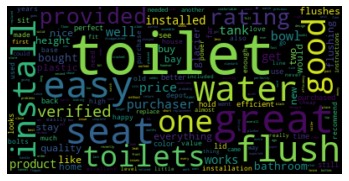

In [49]:
wordcloud = WordCloud().generate_from_frequencies(word_frequency)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Calculate lexical diversity

In [52]:
# The result is a number between 0 and 1 that tells us how many unique tokens there are in the text.
# The higher the number, the more diverse the vocabulary.
# The lower the number, the more repetitive the vocabulary.
lexical_diversity = len(set(filtered_tokens)) / len(filtered_tokens)
print("Lexical diversity: ", lexical_diversity)
# the vocabulary is more repetitive since the values is equal to 0.29

Lexical diversity:  0.29221388367729834
